In [62]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from numpy.linalg import pinv, det, inv

import matplotlib.pyplot as plt

In [55]:
digits = load_digits()

In [56]:
Y = np.ascontiguousarray(digits.target)
X = np.ascontiguousarray(digits.data)
N,n = X.shape
print(len(Y))

1797


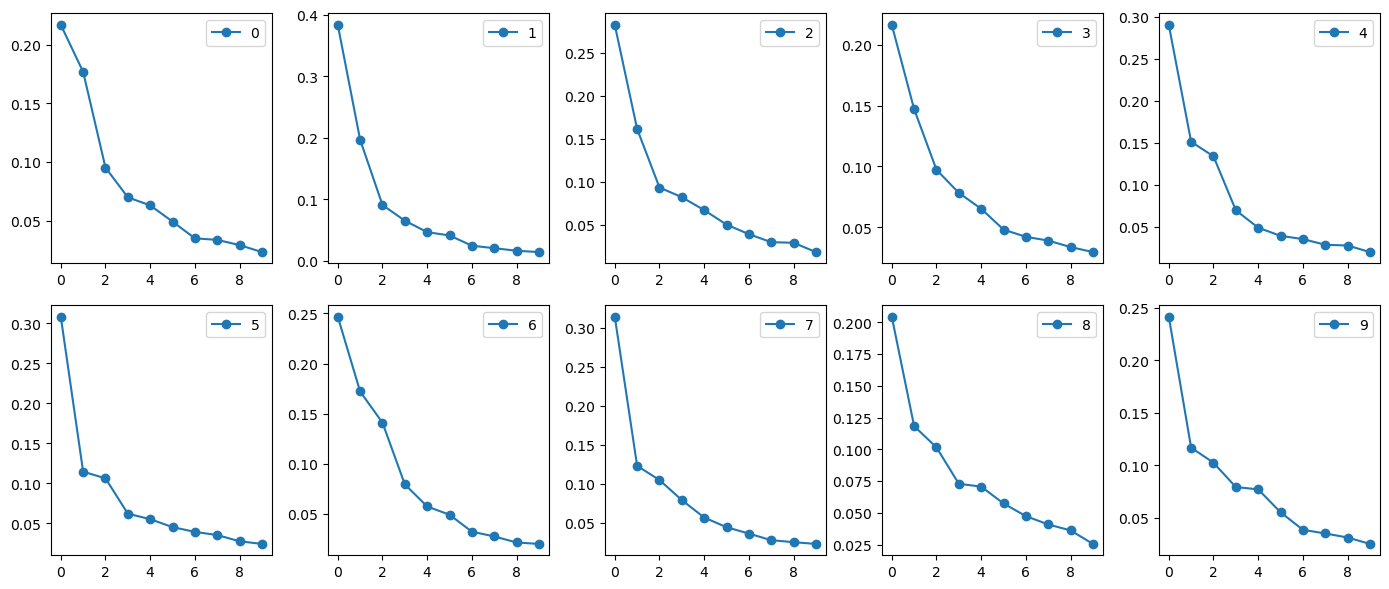

In [57]:
plt.figure(figsize=(14,6))
for d in range(10):
    I = Y == d
    XI = X[I]
    pca = PCA()
    pca.fit(XI)
    plt.subplot(2,5,d+1)
    plt.plot(pca.explained_variance_ratio_[:10], marker='o', label=str(d))
    # plt.xticks([])
    # plt.yticks([])
    plt.legend()
plt.tight_layout()
plt.show()

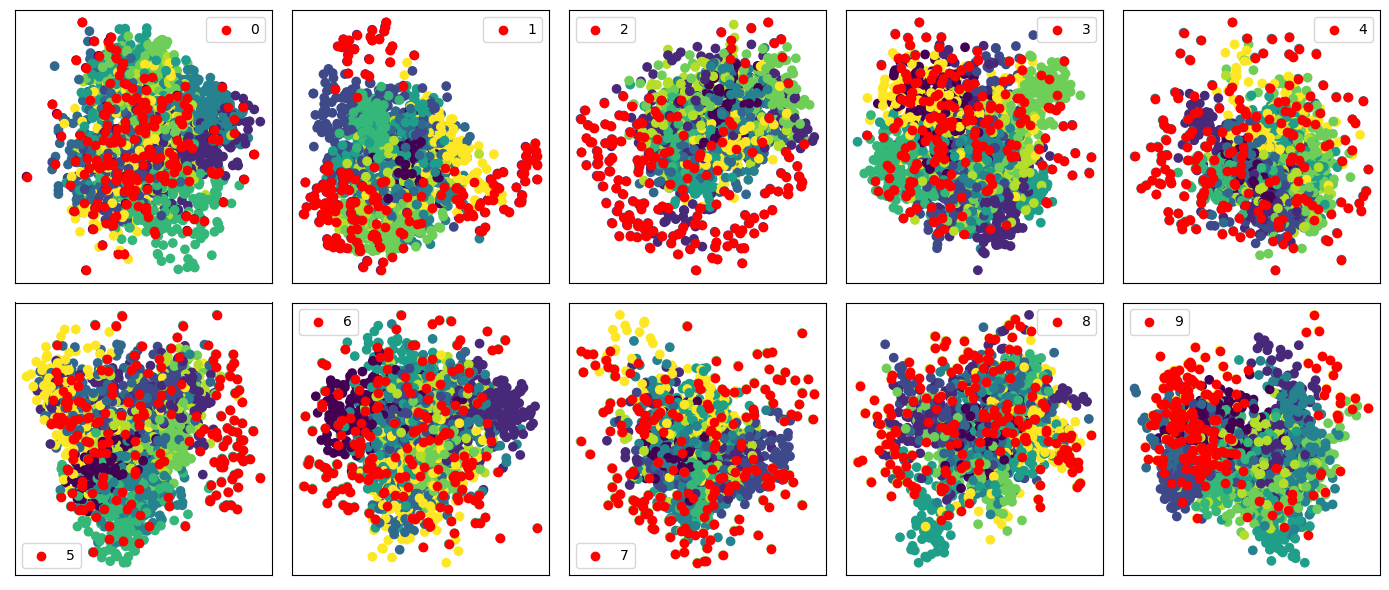

In [58]:
plt.figure(figsize=(14,6))
for d in range(10):
    I = Y == d
    XI = X[I]
    pca = PCA(2)
    pca.fit(XI)
    U = pca.transform(X)
    plt.subplot(2,5,d+1)
    plt.scatter(U[:,0], U[:,1], c=Y)
    plt.scatter(U[I,0], U[I,1], c='r', label=str(d))
    plt.xticks([])
    plt.yticks([])
    plt.legend()
plt.tight_layout()
plt.show()


In [59]:
from mlgrad.pca import scatter_matrix, location, robust_location, robust_scatter_matrix
from mlgrad.funcs import Sqrt, Quantile_Sqrt
from mlgrad.af import averaging_function

In [60]:
C = [location(X[Y==i]) for i in range(10)]

In [64]:
S1 = [pinv(scatter_matrix(X[Y==i] - C[i])) for i in range(10)]

In [69]:
wma = averaging_function("WM", Quantile_Sqrt(0.98, 0.001))
Cr = [robust_location(X[Y==i], wma) for i in range(10)]
S1r = [pinv(robust_scatter_matrix(X[Y==i] - Cr[i], wma)) for i in range(10)]

/home/intellimath/.local/lib/python3.11/site-packages/mlgrad-0.6-py3.11-linux-x86_64.egg/mlgrad/pca/location_scatter.py:132: RuntimeWarning: divide by zero encountered in divide
  S /= det(S) ** n1
/home/intellimath/.local/lib/python3.11/site-packages/mlgrad-0.6-py3.11-linux-x86_64.egg/mlgrad/pca/location_scatter.py:132: RuntimeWarning: invalid value encountered in divide
  S /= det(S) ** n1


LinAlgError: SVD did not converge

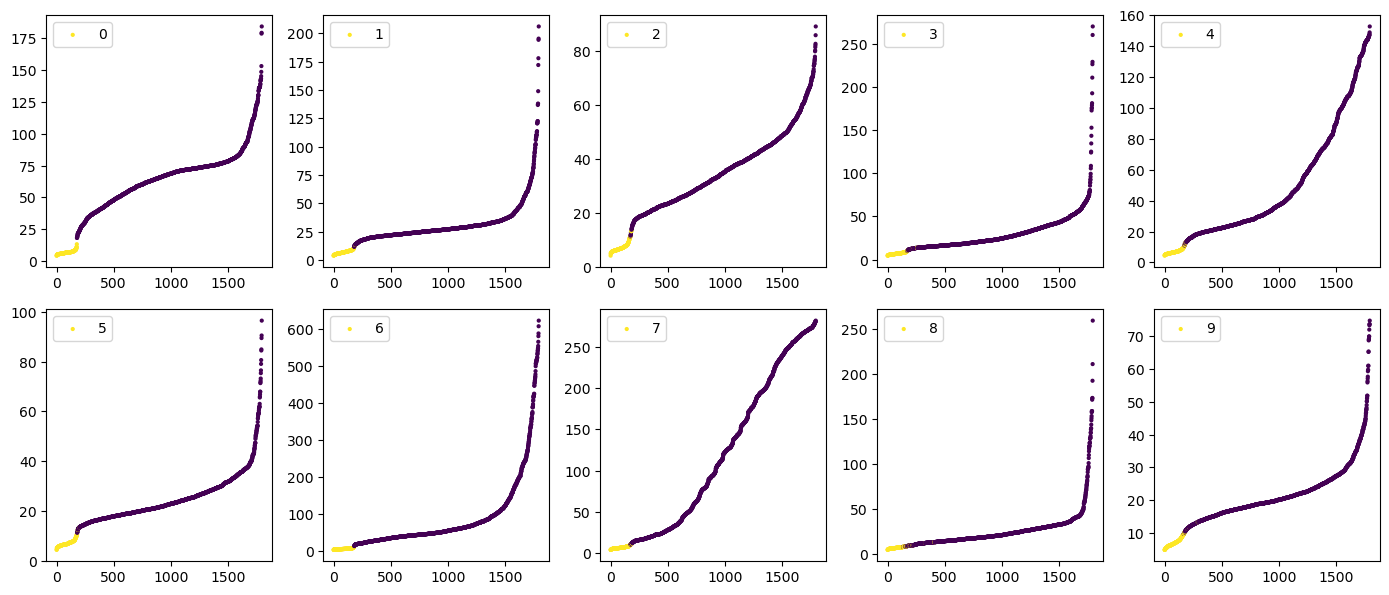

In [65]:
plt.figure(figsize=(14,6))
for d in range(10):
    I = Y == d
    XI = X[I]
    S1d = S1[d]
    cd = C[d]
    Xd = X - cd
    D = np.sqrt(np.einsum('nj,jk,nk->n', Xd, S1d, Xd, optimize=True))
    Yd = I.astype("i")
    ID = np.argsort(D)
    D_s = D[ID]
    Yd_s = Yd[ID]
    # print(S1d.shape, Xd.T.shape, D.shape)
    plt.subplot(2,5,d+1)
    plt.scatter(range(len(X)), D_s, c=Yd_s, label=str(d), s=4)
    plt.legend()
plt.tight_layout()
plt.show()


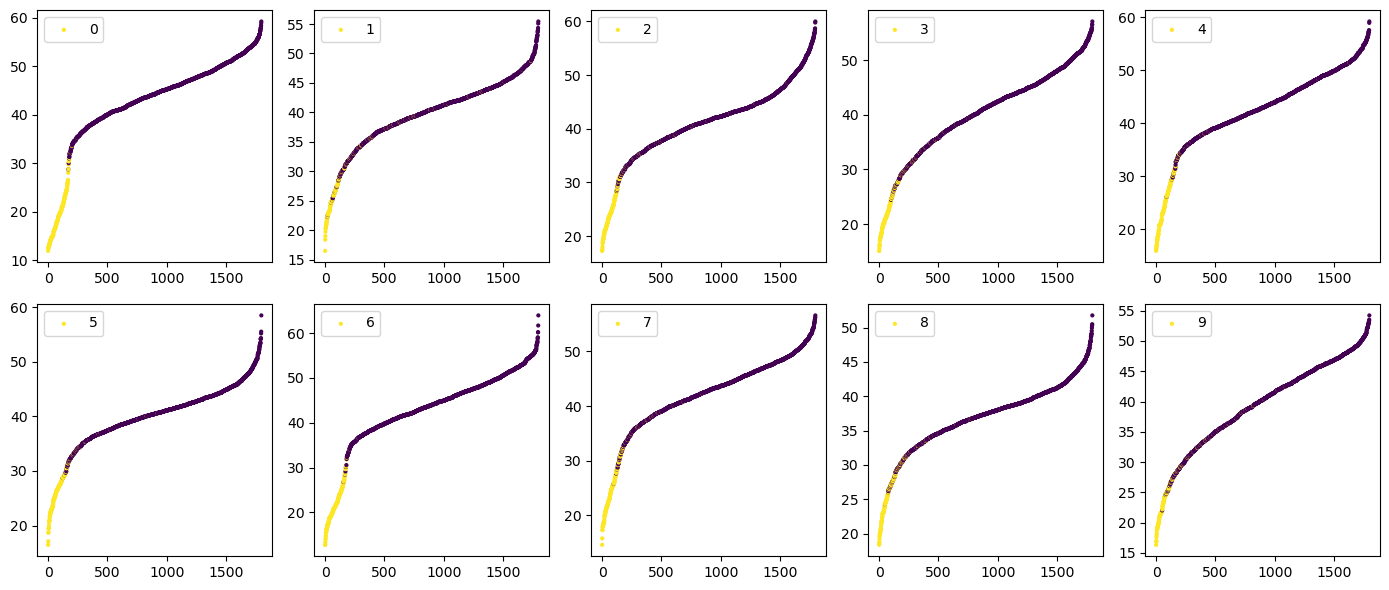

In [66]:
plt.figure(figsize=(14,6))
for d in range(10):
    I = (Y == d)
    cd = C[d]
    Xd = X - cd
    D = np.sqrt((Xd * Xd).sum(axis=1))
    Yd = I.astype("i")
    ID = np.argsort(D)
    D_s = D[ID]
    Yd_s = Yd[ID]
    # print(S1d.shape, Xd.T.shape, D.shape)
    plt.subplot(2,5,d+1)
    plt.scatter(range(len(X)), D_s, c=Yd_s, label=str(d), s=4)
    plt.legend()
plt.tight_layout()
plt.show()


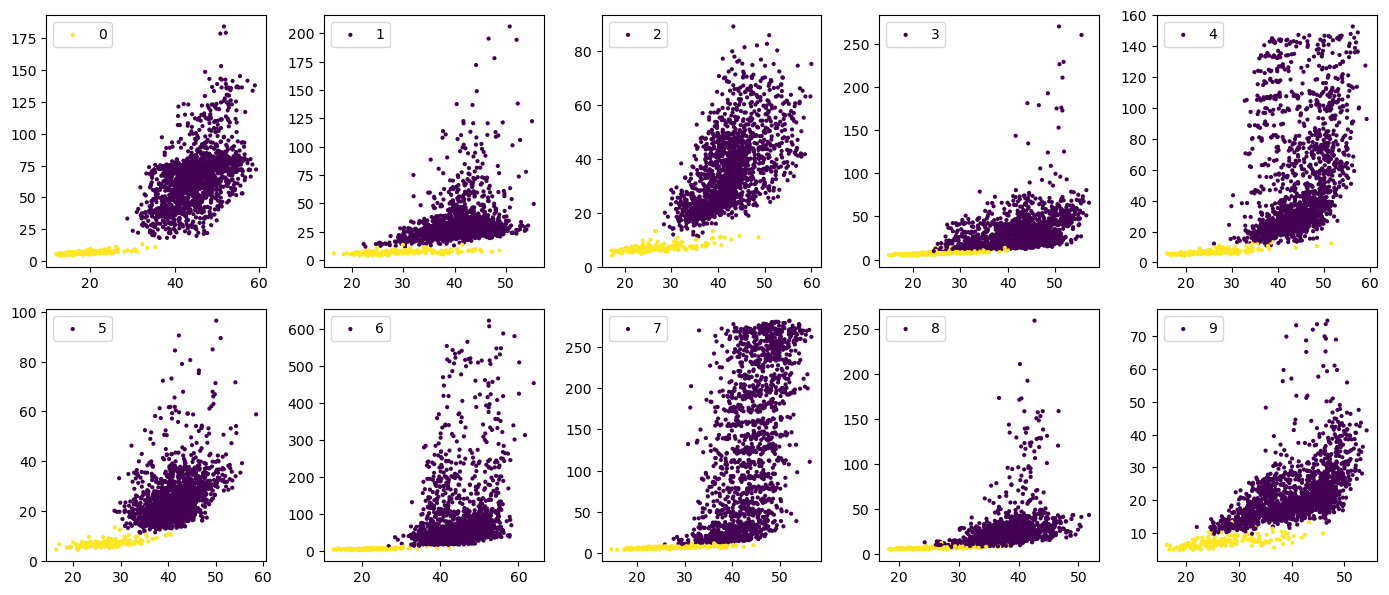

In [67]:
plt.figure(figsize=(14,6))
for d in range(10):
    I = (Y == d)
    cd = C[d]
    Xd = X - cd
    S1d = S1[d]
    D2 = np.sqrt(np.einsum('nj,jk,nk->n', Xd, S1d, Xd, optimize=True))
    D = np.sqrt((Xd * Xd).sum(axis=1))
    Yd = I.astype("i")
    # print(S1d.shape, Xd.T.shape, D.shape)
    plt.subplot(2,5,d+1)
    plt.scatter(D, D2, c=Yd, label=str(d), s=4)
    plt.legend()
plt.tight_layout()
plt.show()
